In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from propofol.utils.calculate_net_strength import load_network_df, run_t_tests

%load_ext autoreload
%autoreload 2

In [12]:
def create_figure_1_line_plots():
    
    
    df = load_network_df(data_dir = 'censor_frames', 
                           use_greene=False, 
                           nodes_to_drop =None)
    df = df[df['fraction censored per run']<.5]
    
    df.loc[df['sedation_level']=='01', 'state'] = 'awake'
    df.loc[df['sedation_level']=='02', 'state'] = 'mild \n sedation'
    df.loc[df['sedation_level']=='03', 'state'] = 'deep \n sedation'
    df.loc[df['sedation_level']=='04', 'state'] = 'recovery'

    
    test1 = df[df['sedation_level']=='01'] # awake
    test2 = df[df['sedation_level']=='02'] # mild
    test3 = df[df['sedation_level']=='03'] # deep
    test4 = df[df['sedation_level']=='04'] #rec
    # ordering the DF so it appears in the order we want
    new= pd.concat([test1, test4, test2, test3])

    movie_df = new.copy()
    movie_df = movie_df[movie_df['task']=='movie']
    movie_df['neg_z_scored'] = stats.zscore(movie_df['neg_network'])
    movie_df['pos_z_scored'] = stats.zscore(movie_df['pos_network'])
    rest_df = new.copy()
    rest_df = rest_df[rest_df['task']=='rest']
    rest_df['neg_z_scored'] = stats.zscore(rest_df['neg_network'])
    rest_df['pos_z_scored'] = stats.zscore(rest_df['pos_network'])

    cmap=sns.diverging_palette(189, 37, s=90, l=66, as_cmap=False)
    orange = '#EDAE3C'
    blue = '#62C8CA'

    sns.set_style("white")
    sns.set_theme(style="white", font_scale=2.3,rc={"lines.linewidth": 2.3, 
                                                    'font.family': 'serif', 
                                                    'font.serif':'Helvetica Neue'})

    sns.despine()

    ALPHA=.36

    fig, axes = plt.subplots(2,2, sharey=True,  figsize=(20,20), dpi=300)
    ax1 = [0, 0]
    ax2 = [0, 1]
    ax3 = [1, 0]
    ax4 = [1, 1]

    fig1 = sns.lineplot(data=rest_df, 
                        sort= False,
                        palette=[orange for i in range(17)],
                        ax = axes[0, 0],
                        x="state",
                        y="pos_z_scored",
                        hue = 'subject',
                        alpha=ALPHA)
    sns.lineplot(data=rest_df, 
                 sort= False,
                 ax = axes[0, 0],
                 x="state", 
                 y="pos_z_scored",
                 color=orange,
                 linewidth = 5)


    fig2 = sns.lineplot(data=movie_df, 
                             palette=[orange for i in range(17)],
                             sort= False,
                              ax = axes[0, 1],
                            x="state",
                            y="pos_z_scored", 
                            hue = 'subject',
                            alpha=ALPHA )

    sns.lineplot(data=movie_df, 
                 sort= False,
                 ax = axes[0, 1],
                 x="state",
                 y="pos_z_scored",
                 linewidth =5,
                 markers=True,
                 color = orange)

    fig1.get_legend().remove()
    fig2.get_legend().remove() 

    fig1.set_xlabel('Rest',  fontsize=55)
    fig1.xaxis.set_label_position('top') 


    fig2.set_xlabel('Narrative Listening', fontsize=55)
    fig2.xaxis.set_label_position('top') 
    fig1.set_ylabel('z-scored high-attention \n network strength', color=orange, fontsize=42)





    fig3 = sns.lineplot(data=rest_df, 
                        sort= False,
                          palette=[blue for i in range(17)],
                        ax = axes[1, 0],
                        x="state",
                        y="neg_z_scored",
                        hue = 'subject',
                        alpha=ALPHA )
    sns.lineplot(data=rest_df, 
                 sort= False,
                 ax = axes[1, 0],
                 x="state", 
                 y="neg_z_scored",
                 color=blue,
                 linewidth = 6,)


    fig4 = sns.lineplot(data=movie_df, 
                        palette=[blue for i in range(17)],
                     sort= False, 
                        ax = axes[1, 1], 
                        x="state",
                        y="neg_z_scored", 
                        hue = 'subject',
                        alpha=ALPHA)

    sns.lineplot(data=movie_df, 
                 sort= False,
                 ax = axes[1, 1],
                 x="state",
                 y="neg_z_scored",
                 linewidth =6,
                 color = blue)


    fig3.get_legend().remove()
    fig4.get_legend().remove() 
    fig4.set_xlabel('')

    fig3.set_ylabel('z-scored low-attention \n network strength', color=blue, fontsize=42)
    sns.despine()

    fig1.tick_params(axis='both', which='major', labelsize=42)
    fig2.tick_params(axis='both', which='major', labelsize=42)
    fig3.tick_params(axis='both', which='major', labelsize=42)
    fig4.tick_params(axis='both', which='major', labelsize=42)

    fig.tight_layout()
    fig1.set_xticklabels(['']*10)
    fig2.set_xticklabels(['']*10)

    fig.subplots_adjust(left=None,  right=None, wspace=.1, hspace=.03)
    fig.savefig('../figures/propofol_figure1_dpi.png' , bbox_inches = "tight")


/var/folders/bn/z81lrvf50vxb8zqrgwrzr26m0000gn/T/ipykernel_10653/133126043.py:148: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig1.set_xticklabels(['']*10)
/var/folders/bn/z81lrvf50vxb8zqrgwrzr26m0000gn/T/ipykernel_10653/133126043.py:149: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig2.set_xticklabels(['']*10)


<Figure size 432x288 with 0 Axes>

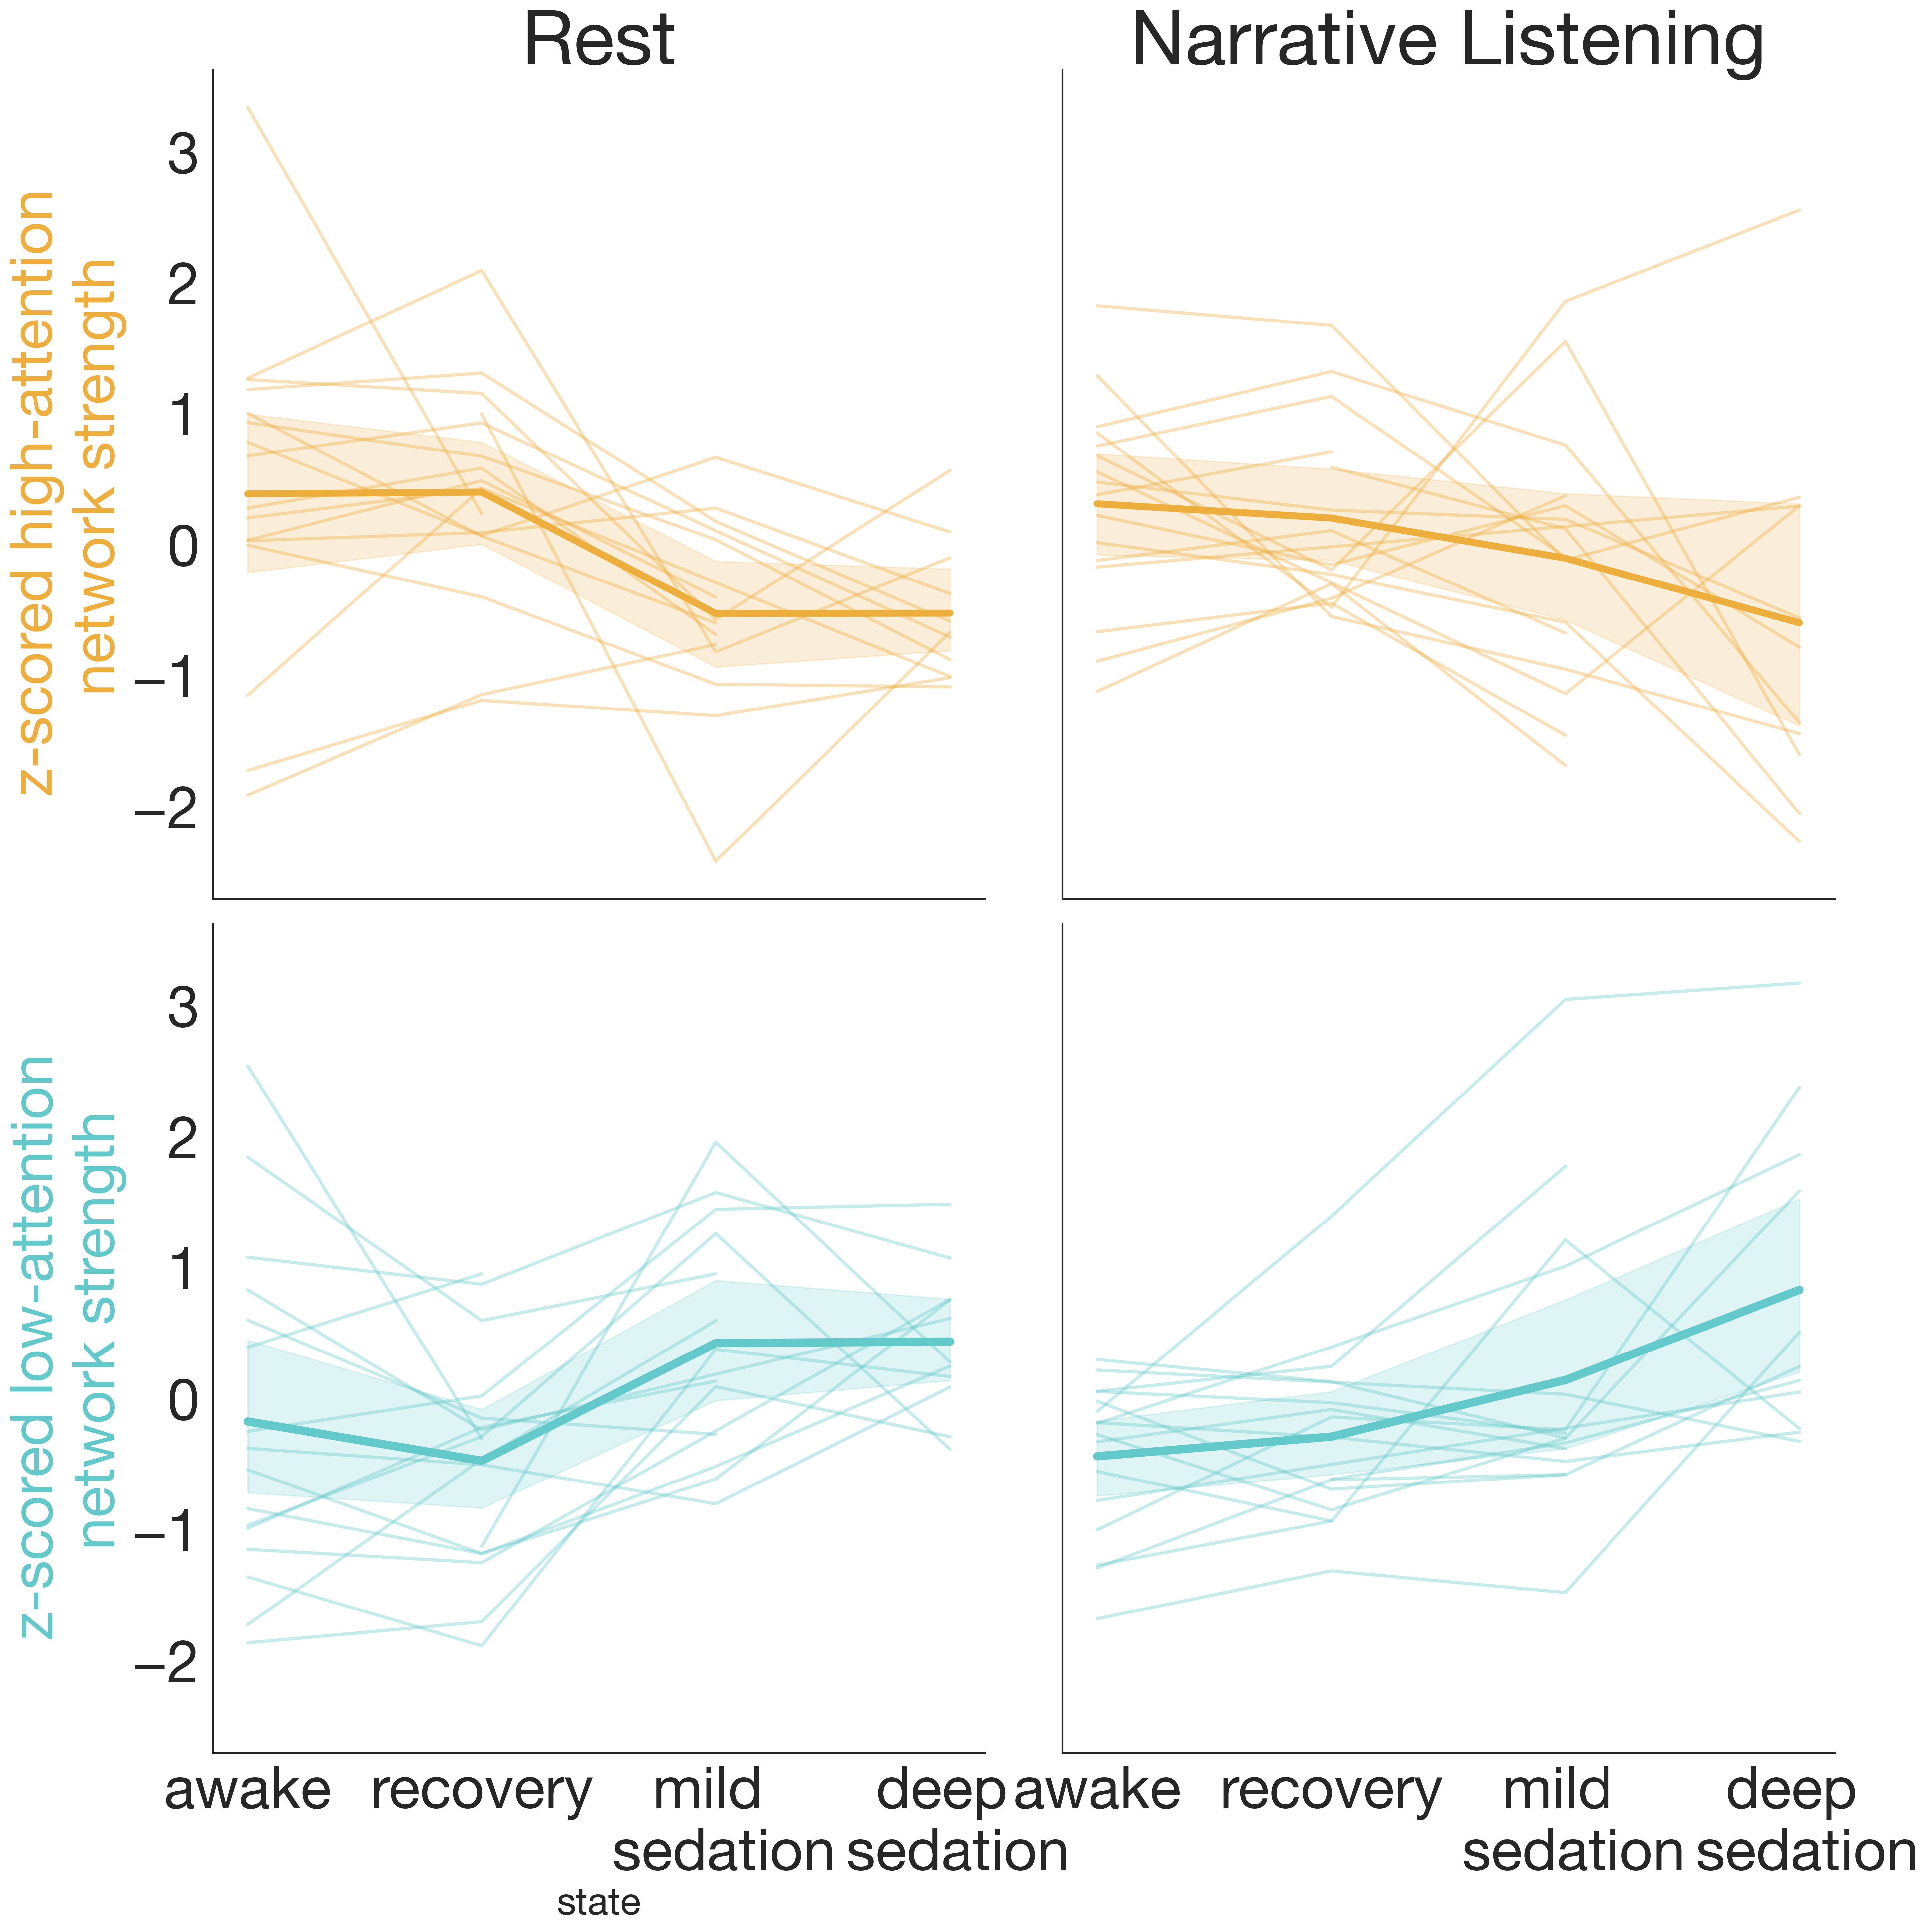

In [13]:
create_figure_1_line_plots()